In [2]:
# import libraries
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

/var/folders/63/xw1tjdvn7dx4ydllj6wms12r0000gn/T/ipykernel_52248/2995425186.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [4]:
df = pd.read_csv('photos_multi/photos_multi/multi_label.csv', na_filter=False)
df

,download_image_path,label
0,in_hoosier_ver01_data_sn82015679_00202191757_1...,human
1,dlc_rottweiler_ver01_data_sn83045462_002806555...,human
2,curiv_joshuaTree_ver01_data_sn85066387_0017503...,human|landscape
3,curiv_fiddleneck_ver01_data_sn85066408_0027176...,human
4,me_aroostook_ver01_data_sn84022374_00332895473...,human
...,...,...
1995,khi_corbett_ver01_data_sn82016014_00295870278_...,animal
1996,kyu_casablanca_ver01_data_sn86069457_002065332...,human
1997,idhi_angkor_ver01_data_sn86091084_00279550845_...,human
1998,txdn_infiniti_ver03_data_sn88083938_0020029426...,human-structure


In [5]:
# counting the number of labels
df['label'].value_counts()

label
human                                     1371
human-structure                            142
human|human-structure                      104
landscape                                   83
                                            80
human-structure|landscape                   69
human|landscape                             48
human|human-structure|landscape             28
human|animal                                24
animal                                      20
human|animal|landscape                      11
human|animal|human-structure                 9
animal|human-structure                       4
human|animal|human-structure|landscape       3
animal|landscape                             3
animal|human-structure|landscape             1
Name: count, dtype: int64

In [6]:
labels = df['label'].to_list()
labels[:6]

['human', 'human', 'human|landscape', 'human', 'human', 'human']

In [8]:
split_labels = [label.split("|") for label in labels]
split_labels[:4]

[['human'], ['human'], ['human', 'landscape'], ['human']]

In [11]:
labels = [label for sublist in split_labels for label in sublist]
labels[:4]

['human', 'human', 'human', 'landscape']

In [16]:
from collections import Counter
label_freqs = Counter(labels)
label_freqs

Counter({'human': 1598,
         'human-structure': 360,
         'landscape': 246,
         '': 80,
         'animal': 75})

In [17]:
# how many total labels we have in this dataset
sum(label_freqs.values())

2359

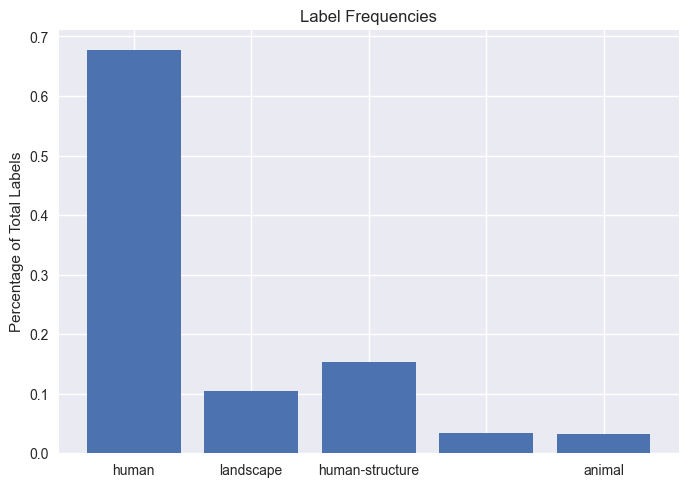

In [18]:
import matplotlib.pyplot as plt

plt.bar(
    label_freqs.keys(), # pass in our labels
    list(map(lambda x: x / sum(label_freqs.values()), label_freqs.values())),  # normalised values
)

# add a title to the plot
plt.title("Label Frequencies")

# add a y-axis label
plt.ylabel("Percentage of Total Labels")
plt.show() # show the plot


In [19]:
from fastai.vision.all import *

/Users/ashleyjeon/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [20]:
df.columns

Index(['download_image_path', 'label'], dtype='object')

In [25]:
# Prepares our input data and labels to a form that can be used as input for a CVM
photo_data = ImageDataLoaders.from_df(
    df, # the dataframe where our labels and image file paths are stored
    folder = 'photos_multi/photos_multi/photo_images', # the path to the directory holding the images
    bs=32, # the batch size (number of images + labels)
    label_delim="|", # the deliminator between each label in our label column
    item_tfms=Resize(224), # resize each image to 224z224
    valid_pct=0.3, # use 30% of the data as validation data
    seed=42 # set a seed to make results more reproducible
)

In [26]:
photo_data

In [27]:
photo_data.show_batch(figsize=(15,15))